# ANALYSIS OF WINE QUALITY

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


### Load Data set

In [2]:
df=pd.read_csv(r"C:\Users\routj\Downloads\winequality.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red


In [4]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
good                      int64
color                    object
dtype: object

# Data Cleaning

#### Missing Values

In [5]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
good                    0
color                   0
dtype: int64

#### Duplicate Values

In [6]:
df.duplicated().sum()


1177

In [7]:
df.drop_duplicates(keep='first',inplace=True,ignore_index=True)

In [8]:
df.duplicated().sum()

0

In [9]:
df.drop_duplicates(keep='first',inplace=True,ignore_index=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.shape

(5320, 14)

#### Outliers

fixed acidity              Axes(0.125,0.712609;0.168478x0.167391)
volatile acidity        Axes(0.327174,0.712609;0.168478x0.167391)
citric acid             Axes(0.529348,0.712609;0.168478x0.167391)
residual sugar          Axes(0.731522,0.712609;0.168478x0.167391)
chlorides                  Axes(0.125,0.511739;0.168478x0.167391)
free sulfur dioxide     Axes(0.327174,0.511739;0.168478x0.167391)
total sulfur dioxide    Axes(0.529348,0.511739;0.168478x0.167391)
density                 Axes(0.731522,0.511739;0.168478x0.167391)
pH                          Axes(0.125,0.31087;0.168478x0.167391)
sulphates                Axes(0.327174,0.31087;0.168478x0.167391)
alcohol                  Axes(0.529348,0.31087;0.168478x0.167391)
quality                  Axes(0.731522,0.31087;0.168478x0.167391)
good                           Axes(0.125,0.11;0.168478x0.167391)
dtype: object

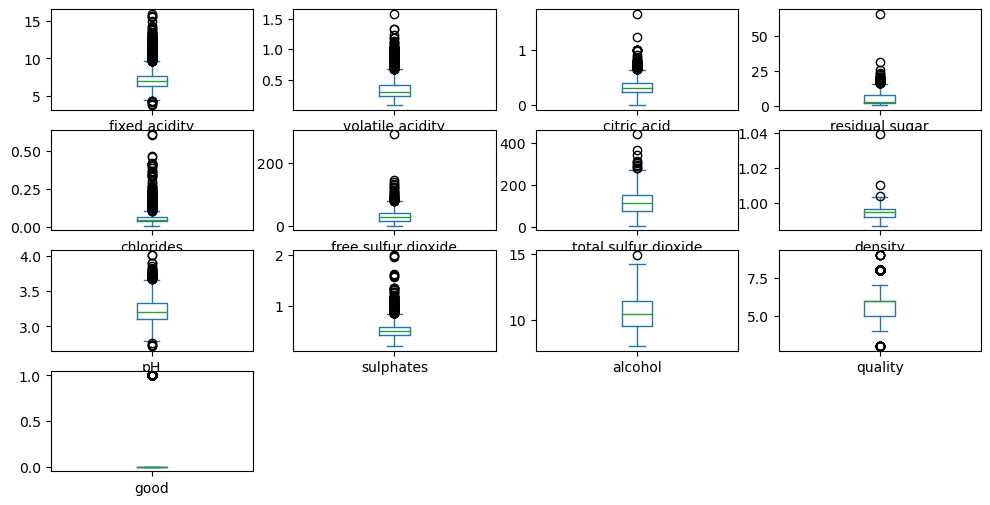

In [12]:
df.plot(kind="box",subplots=True,layout=(4,4),figsize=(12,6))

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5320 entries, 0 to 5319
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5320 non-null   float64
 1   volatile acidity      5320 non-null   float64
 2   citric acid           5320 non-null   float64
 3   residual sugar        5320 non-null   float64
 4   chlorides             5320 non-null   float64
 5   free sulfur dioxide   5320 non-null   float64
 6   total sulfur dioxide  5320 non-null   float64
 7   density               5320 non-null   float64
 8   pH                    5320 non-null   float64
 9   sulphates             5320 non-null   float64
 10  alcohol               5320 non-null   float64
 11  quality               5320 non-null   int64  
 12  good                  5320 non-null   int64  
 13  color                 5320 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 582.0+ KB


In [14]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0,red
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,0,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0,white
5316,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0,white
5317,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0,white
5318,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1,white


In [15]:
continuous_cols = df[['fixed acidity', 'volatile acidity', 'citric acid', 
                   'residual sugar', 'chlorides', 'free sulfur dioxide', 
                   'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
categorical_cols = df[['quality', 'good', 'color']]


for i in continuous_cols:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    outliers_indices = df[(df[i] < lower_bound) | (df[i] > upper_bound)].index
    df = df.drop(outliers_indices)


for i in categorical_cols:
    
    value_counts = df[i].value_counts()
    rare_categories = value_counts[value_counts < 10].index.tolist() 
    df = df[~df[i].isin(rare_categories)]


In [16]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0,red
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,0,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0,white
5316,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0,white
5317,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0,white
5318,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1,white


# Visualization & Non-Visualization

## non-visualization univariate analysis 

In [17]:
df_con = df.select_dtypes(include=["float64"])
df_cat = df.select_dtypes(include="object")
df_dis = df.select_dtypes(include="int64")

In [18]:
df_dis.describe(include=['int64'])

,quality,good
count,5042.000000,5042.000000
mean,5.814359,0.194962
std,0.867340,0.396211
min,3.000000,0.000000
25%,5.000000,0.000000
50%,6.000000,0.000000
75%,6.000000,0.000000
max,8.000000,1.000000


In [19]:
df_cat.describe(include=['object'])

,color
count,5042
unique,2
top,white
freq,3869


In [20]:
quality = df[df["quality"]>5]

In [21]:
qual_con = quality.select_dtypes(include=["float64"])
qual_cat = quality.select_dtypes(include="object")
qual_dis = quality.select_dtypes(include="int64")

In [22]:
qual_con.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,3197.0,7.045793,1.144271,3.80000,6.3000,6.90000,7.50000,11.6000
volatile acidity,3197.0,0.303969,0.134758,0.08000,0.2100,0.27000,0.36000,0.9100
citric acid,3197.0,0.320694,0.123106,0.00000,0.2600,0.31000,0.38000,0.8100
residual sugar,3197.0,4.919221,4.201899,0.70000,1.8000,2.80000,7.20000,20.8000
chlorides,3197.0,0.048098,0.019169,0.01200,0.0350,0.04300,0.05500,0.1420
free sulfur dioxide,3197.0,31.097748,16.195040,1.00000,19.0000,30.00000,41.00000,112.0000
total sulfur dioxide,3197.0,113.708320,52.205092,6.00000,83.0000,116.00000,149.00000,289.0000
density,3197.0,0.993736,0.002845,0.98711,0.9914,0.99352,0.99585,1.0026
pH,3197.0,3.231530,0.158096,2.72000,3.1200,3.22000,3.34000,3.9000
sulphates,3197.0,0.531117,0.140479,0.22000,0.4300,0.51000,0.61000,1.1000


In [23]:
qual_con.agg(["median","skew","kurt"])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
median,6.900000,0.270000,0.310000,2.800000,0.043000,30.000000,116.000000,0.993520,3.220000,0.510000,10.900000
skew,1.163078,1.421226,0.074916,1.267240,1.392294,0.677568,-0.045266,0.224141,0.304249,0.785657,0.188065
kurt,2.137685,2.198454,1.504835,0.792451,2.197059,0.734303,-0.309894,-0.794490,0.269851,0.562845,-0.790281


In [24]:
qual_dis.value_counts()

quality  good
6        0       2214
7        1        836
8        1        147
dtype: int64

In [25]:
qual_cat.value_counts()

color
white    2569
red       628
dtype: int64

## visualization univariate analysis 

In [26]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'good', 'color'],
      dtype='object')

#### For Numerical Column

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5042 entries, 0 to 5319
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5042 non-null   float64
 1   volatile acidity      5042 non-null   float64
 2   citric acid           5042 non-null   float64
 3   residual sugar        5042 non-null   float64
 4   chlorides             5042 non-null   float64
 5   free sulfur dioxide   5042 non-null   float64
 6   total sulfur dioxide  5042 non-null   float64
 7   density               5042 non-null   float64
 8   pH                    5042 non-null   float64
 9   sulphates             5042 non-null   float64
 10  alcohol               5042 non-null   float64
 11  quality               5042 non-null   int64  
 12  good                  5042 non-null   int64  
 13  color                 5042 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 590.9+ KB


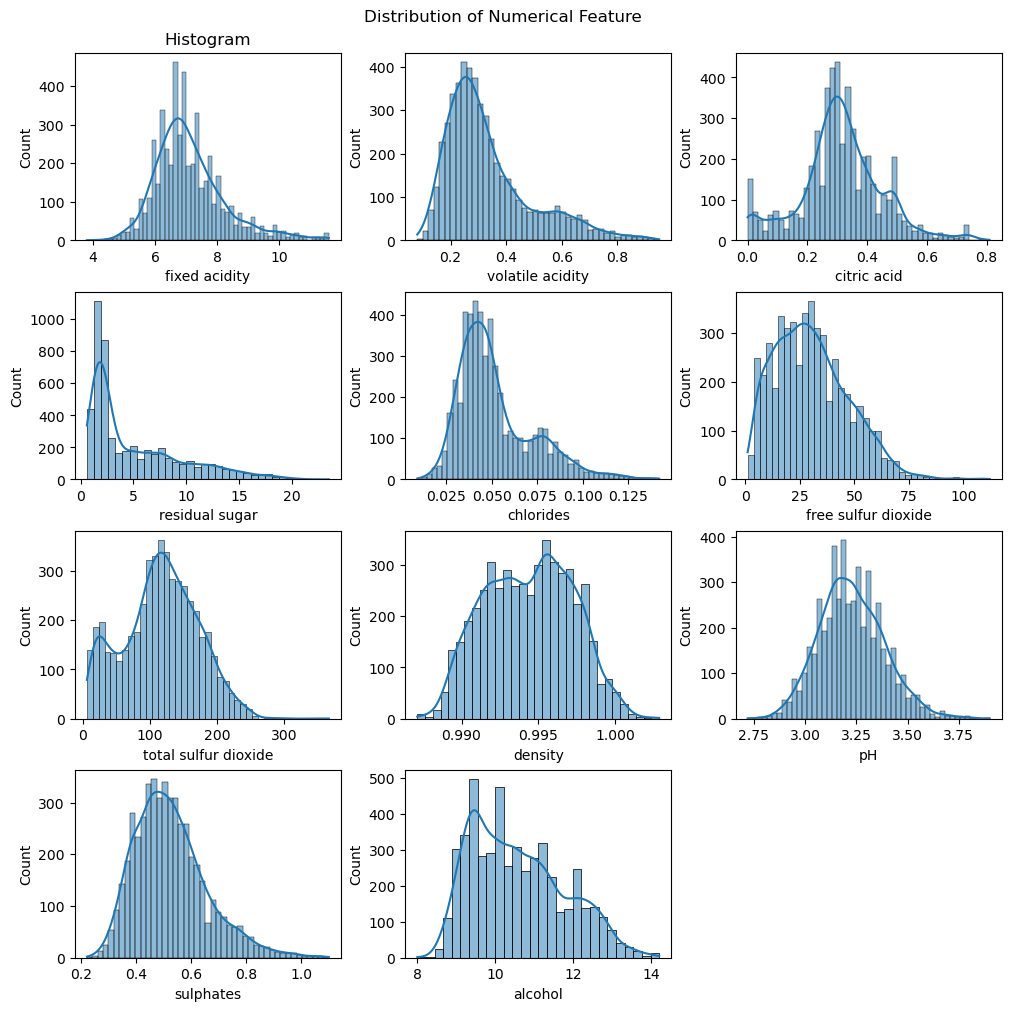

In [28]:
fig, axs = plt.subplots(4,3, figsize=(10,10), layout="constrained")
fig.suptitle("Distribution of Numerical Feature ")
axs[0][0].set_title("Histogram")
sns.histplot(data=df, x='fixed acidity',kde=True, ax=axs[0][0])
sns.histplot(data=df, x='volatile acidity',kde=True, ax=axs[0][1])
sns.histplot(data=df, x='citric acid',kde=True, ax=axs[0][2])
sns.histplot(data=df, x='residual sugar',kde=True, ax=axs[1][0])
sns.histplot(data=df, x='chlorides',kde=True, ax=axs[1][1])
sns.histplot(data=df, x='free sulfur dioxide',kde=True, ax=axs[1][2])
sns.histplot(data=df, x='total sulfur dioxide',kde=True, ax=axs[2][0])
sns.histplot(data=df, x='density',kde=True, ax=axs[2][1])
sns.histplot(data=df, x='pH',kde=True, ax=axs[2][2])
sns.histplot(data=df, x='sulphates',kde=True, ax=axs[3][0])
sns.histplot(data=df, x='alcohol',kde=True, ax=axs[3][1])
fig.delaxes(axs[3, 2])

plt.show()

`Insights`
* The feature fixed acidity is following normal distribution
* Volatile acidity is following right positively skewed
* citric acid is also following normal distribution ,and in 0.5 point of citric acid it have a little mode
* residual sugar is following right positively skewed
* Chlorides also following little bit normal distribution
* sulphates and ph also following Normal distribution

In [29]:
df = df.loc[df["fixed acidity"]<15]
df = df.loc[df['volatile acidity']<1.2]
df = df.loc[df['citric acid']<1]
df = df.loc[df['residual sugar']<60]
df = df.loc[df['chlorides']<0.5]
df = df.loc[df['free sulfur dioxide']<250]
df = df.loc[df['total sulfur dioxide']<400]
df = df.loc[df['density']<1]
df = df.loc[df["pH"]<3.9]
df = df.loc[df['sulphates']<1.5]

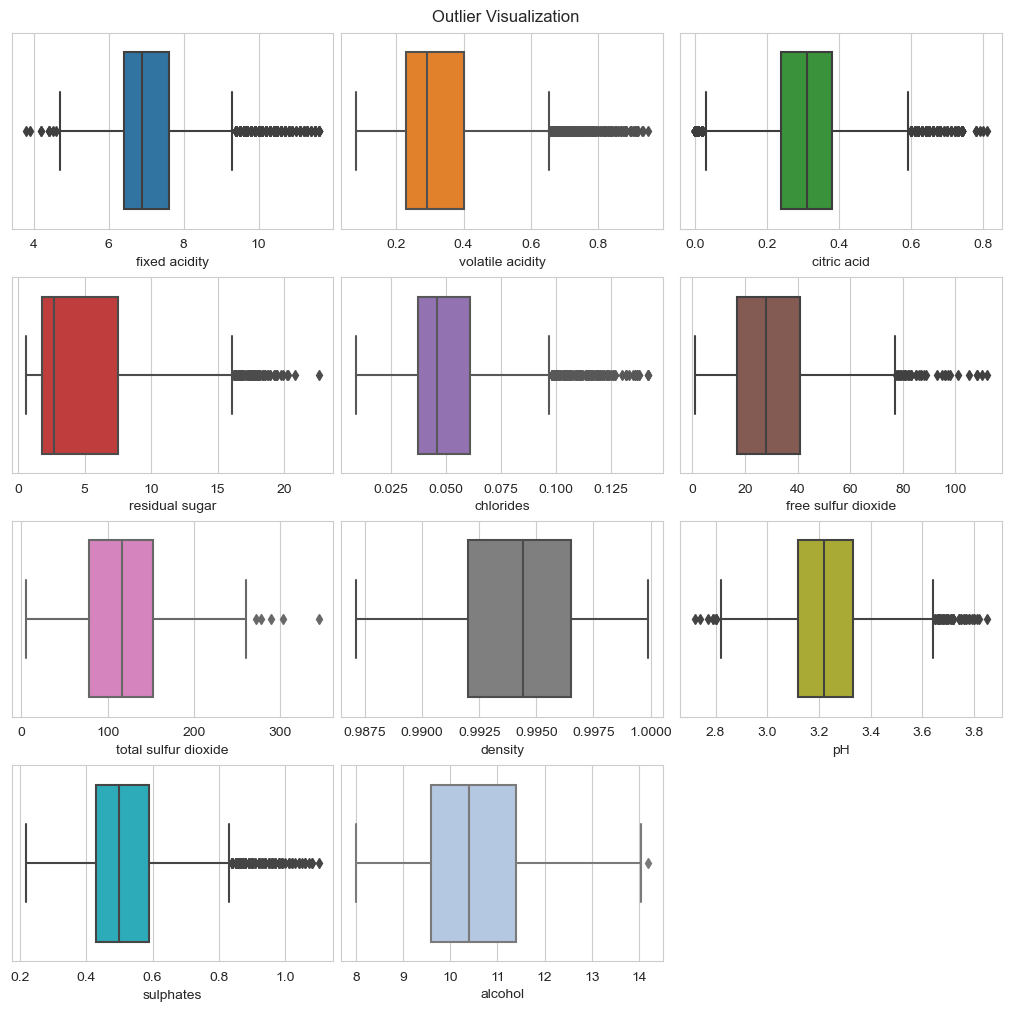

In [30]:
sns.set_style("whitegrid")

fig, axs = plt.subplots(4, 3, figsize=(10, 10), layout="constrained")
fig.suptitle("Outlier Visualization")

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b',
          '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#aec7e8']

sns.boxplot(data=df, x='fixed acidity', ax=axs[0][0], color=colors[0])
sns.boxplot(data=df, x='volatile acidity', ax=axs[0][1], color=colors[1])
sns.boxplot(data=df, x='citric acid', ax=axs[0][2], color=colors[2])
sns.boxplot(data=df, x='residual sugar', ax=axs[1][0], color=colors[3])
sns.boxplot(data=df, x='chlorides', ax=axs[1][1], color=colors[4])
sns.boxplot(data=df, x='free sulfur dioxide', ax=axs[1][2], color=colors[5])
sns.boxplot(data=df, x='total sulfur dioxide', ax=axs[2][0], color=colors[6])
sns.boxplot(data=df, x='density', ax=axs[2][1], color=colors[7])
sns.boxplot(data=df, x='pH', ax=axs[2][2], color=colors[8])
sns.boxplot(data=df, x='sulphates', ax=axs[3][0], color=colors[9])
sns.boxplot(data=df, x='alcohol', ax=axs[3][1], color=colors[10])

fig.delaxes(axs[3, 2])

plt.show()


`Insights`
* In this plot fixed acidity ,volatile acidity,cirtic acid,residual sugar,chlorides,free sulphor dioxide,ph,sulphates 
  are containg extreme higher values nothing but outliers.
* while toltal suphor dioxide has contain very less no of outliers
* but alcohol contain only 1 outlier which is not harmfull.

<Axes: xlabel='color', ylabel='count'>

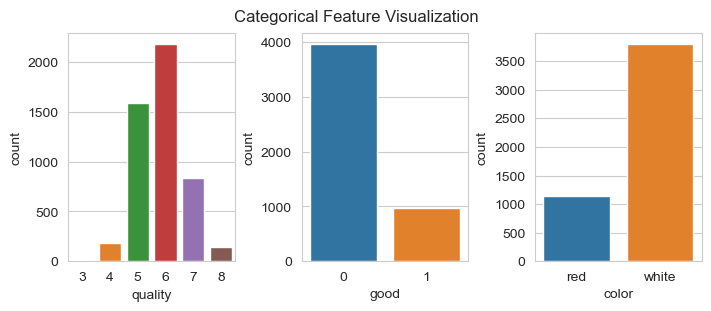

In [31]:
fig,axs=plt.subplots(1,3,figsize=(7,3),layout="constrained")
fig.suptitle("Categorical Feature Visualization")

sns.countplot(data=df, x="quality",ax=axs[0])
sns.countplot(data=df, x="good",ax=axs[1])
sns.countplot(data=df, x="color",ax=axs[2])

`Insights`
* good and count features both are following Bernouli Distribution
* while Quality is following binomial distribution
* The highest count of wine are those are having quality 6
* People are less prefer wine quality of 4
* people are preper white  wine as compare to red wine
* The Wine taste is very bad 

### For Bernouli distribution

In [32]:
df["good"].count()

4947

In [33]:
y=df["good"]

In [34]:
def discrete_non_viz_analysis(y):
    series = pd.Series(y)
    print(series.agg(['count', 'nunique', 'unique']))
    print('Value Counts: \n', series.value_counts())
    print()

In [35]:
def discrete_viz_analysis(y):
    fig, ax = plt.subplots(figsize=(5, 3), constrained_layout=True)
    fig.suptitle("Discrete Distribution Plot")
    
    ax.set_title("Count Plot")
    sns.countplot(x=y, ax=ax)
    
    plt.xticks(rotation=45)
    plt.show()

In [36]:
def bernoulli_distribution_generator(p, size):
    return np.random.binomial(n=1, p=p, size=size)

count        4947
nunique         2
unique     [1, 0]
dtype: object
Value Counts: 
 0    3991
1     956
dtype: int64



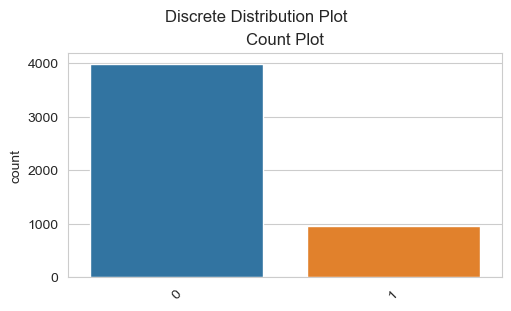

In [37]:
bernoulli_dist = bernoulli_distribution_generator(p=0.18966165413533834, size=4947)

discrete_non_viz_analysis(y=bernoulli_dist)

discrete_viz_analysis(y=bernoulli_dist)

### Binomial Distribution

In [38]:
s=df["quality"].value_counts()

In [39]:
z=s.sum()

In [40]:
s/z

6    0.441075
5    0.321609
7    0.167981
4    0.036992
8    0.029311
3    0.003032
Name: quality, dtype: float64

In [41]:
y.count()

4947

In [42]:
y=df["quality"]

In [43]:
def binomial_distribution_generator(n, p, size):
    # Define the number of trials (n) and the probability of success (p)
    return np.random.binomial(n=n, p=p, size=size)


count                          4947
nunique                           8
unique     [3, 4, 5, 2, 6, 0, 1, 7]
dtype: object
Value Counts: 
 3    1447
4    1121
2    1118
5     519
1     497
6     131
0      96
7      18
dtype: int64



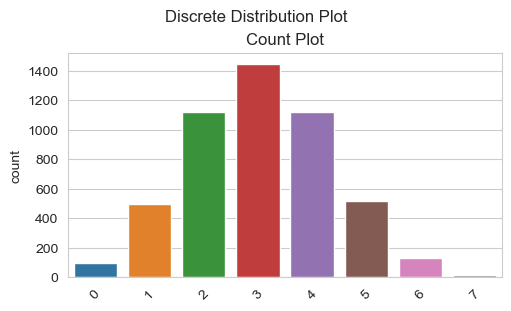

In [44]:
binomial_dist = binomial_distribution_generator(n=7, p=0.436509, size=4947)

discrete_non_viz_analysis(y=binomial_dist)

discrete_viz_analysis(y=binomial_dist)

# Non visualization for bi variate

# Numerical vs Categorical

In [45]:
# Using groupby

In [46]:
numeric_columns = ['alcohol','density']
categorical_column = ['quality'] 
grouped_summary = df.groupby(categorical_column)[numeric_columns].agg(['mean', 'median', 'count'])
print(grouped_summary)

           alcohol                density               
              mean median count      mean   median count
quality                                                 
3        10.356667   10.2    15  0.994618  0.99500    15
4        10.204918   10.1   183  0.994605  0.99470   183
5         9.900448    9.7  1591  0.995483  0.99580  1591
6        10.681515   10.5  2182  0.994151  0.99422  2182
7        11.539150   11.5   831  0.992650  0.99200   831
8        11.971724   12.2   145  0.991972  0.99164   145


In [47]:
# Using pivot table

In [48]:
numeric_columns = ['volatile acidity','citric acid','chlorides','sulphates']
categorical_column = 'good'
pivot_table = pd.pivot_table(df,values=numeric_columns,  # Numeric columns to summarize
                                index=categorical_column,  # Categorical column for grouping
                                aggfunc={'mean', 'median', 'count'})  # Aggregation functions

In [49]:
print(pivot_table)

     chlorides                  citric acid                  sulphates  \
         count      mean median       count      mean median     count   
good                                                                     
0         3971  0.053684  0.048        3971  0.305057   0.30      3971   
1          976  0.043144  0.038         976  0.330779   0.32       976   

                      volatile acidity                   
          mean median            count      mean median  
good                                                     
0     0.519381   0.50             3971  0.344663   0.29  
1     0.539057   0.51              976  0.292259   0.28  


# Categorical vs Categorical

In [50]:
df['quality'] = df['quality'].astype(str)

In [51]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0,red
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,0,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0,white
5316,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0,white
5317,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0,white
5318,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1,white


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4947 entries, 0 to 5319
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4947 non-null   float64
 1   volatile acidity      4947 non-null   float64
 2   citric acid           4947 non-null   float64
 3   residual sugar        4947 non-null   float64
 4   chlorides             4947 non-null   float64
 5   free sulfur dioxide   4947 non-null   float64
 6   total sulfur dioxide  4947 non-null   float64
 7   density               4947 non-null   float64
 8   pH                    4947 non-null   float64
 9   sulphates             4947 non-null   float64
 10  alcohol               4947 non-null   float64
 11  quality               4947 non-null   object 
 12  good                  4947 non-null   int64  
 13  color                 4947 non-null   object 
dtypes: float64(11), int64(1), object(2)
memory usage: 579.7+ KB


In [53]:
pd.crosstab(df['quality'], df['alcohol'], normalize='columns')

alcohol,8.000000,8.400000,8.500000,8.600000,8.700000,8.800000,8.900000,9.000000,9.050000,9.100000,...,13.500000,13.550000,13.566667,13.600000,13.700000,13.800000,13.900000,14.000000,14.050000,14.200000
quality,,,,,,,,,,,,,,,,,,,,,
3,0.5,0.0,0.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.009259,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.5,0.0,0.230769,0.054054,0.035088,0.056604,0.084746,1.0,0.037037,...,0.090909,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
5,0.5,0.5,0.4,0.615385,0.567568,0.614035,0.528302,0.533898,0.0,0.537037,...,0.090909,0.0,0.0,0.090909,0.0,0.0,0.0,0.000000,0.0,0.0
6,0.0,0.0,0.4,0.153846,0.297297,0.280702,0.377358,0.305085,0.0,0.342593,...,0.090909,1.0,0.0,0.363636,0.0,1.0,0.0,0.363636,0.0,0.0
7,0.0,0.0,0.0,0.000000,0.081081,0.035088,0.018868,0.076271,0.0,0.074074,...,0.727273,0.0,1.0,0.545455,1.0,0.0,1.0,0.363636,1.0,1.0
8,0.0,0.0,0.0,0.000000,0.000000,0.035088,0.018868,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.272727,0.0,0.0


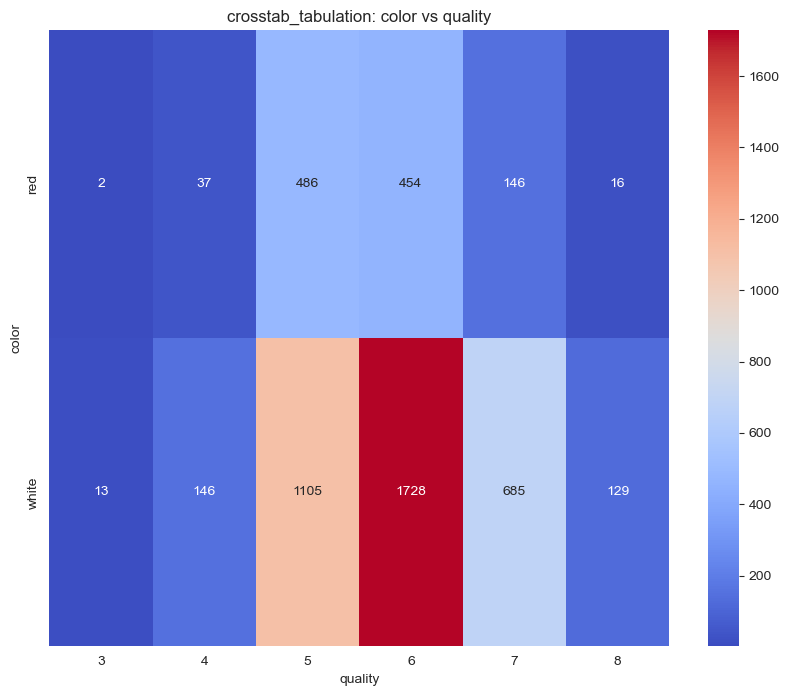

In [54]:
categorical_column1 = 'color'
categorical_column2 = 'quality'
crosstab_tabulation = pd.crosstab(df[categorical_column1],df[categorical_column2])
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(crosstab_tabulation, annot=True, fmt='d', cmap='coolwarm', cbar=True)
plt.title(f'crosstab_tabulation: {categorical_column1} vs {categorical_column2}')
plt.xlabel(categorical_column2)
plt.ylabel(categorical_column1)
plt.show()

In [55]:
pd.crosstab(df_dis["quality"],df_dis["good"],normalize=True)

good,0,1
quality,,
3,0.003372,0.000000
4,0.037088,0.000000
5,0.325466,0.000000
6,0.439111,0.000000
7,0.000000,0.165807
8,0.000000,0.029155


In [56]:
pd.crosstab(df_dis["quality"],df_cat["color"],normalize=True)

color,red,white
quality,,
3,0.000595,0.002777
4,0.007933,0.029155
5,0.099564,0.225902
6,0.092225,0.346886
7,0.029155,0.136652
8,0.003173,0.025982


In [57]:
pd.crosstab(df_cat["color"],df_dis["good"],normalize=True)

good,0,1
color,,
red,0.200317,0.032328
white,0.604720,0.162634


#### Numerical Vs Numerical

In [58]:
df.corr()

C:\Users\routj\AppData\Local\Temp\ipykernel_19044\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good
fixed acidity,1.000000,0.197833,0.267326,-0.114178,0.390902,-0.271941,-0.300135,0.422923,-0.258395,0.240559,-0.099142,-0.055922
volatile acidity,0.197833,1.000000,-0.444443,-0.165488,0.511801,-0.349367,-0.398758,0.304910,0.250707,0.215810,-0.067618,-0.133912
citric acid,0.267326,-0.444443,1.000000,0.153113,-0.136224,0.170593,0.245356,0.022456,-0.315815,-0.010189,0.019691,0.075431
residual sugar,-0.114178,-0.165488,0.153113,1.000000,-0.144742,0.422622,0.479553,0.512586,-0.245094,-0.186226,-0.308955,-0.087102
chlorides,0.390902,0.511801,-0.136224,-0.144742,1.000000,-0.268727,-0.370513,0.543085,0.200939,0.339931,-0.329611,-0.203152
free sulfur dioxide,-0.271941,-0.349367,0.170593,0.422622,-0.268727,1.000000,0.712160,0.037403,-0.159531,-0.182922,-0.173696,0.017096
total sulfur dioxide,-0.300135,-0.398758,0.245356,0.479553,-0.370513,0.712160,1.000000,0.031060,-0.231974,-0.267822,-0.259162,-0.070447
density,0.422923,0.304910,0.022456,0.512586,0.543085,0.037403,0.031060,1.000000,0.085612,0.247399,-0.710822,-0.313704
pH,-0.258395,0.250707,-0.315815,-0.245094,0.200939,-0.159531,-0.231974,0.085612,1.000000,0.263470,0.066058,0.047191
sulphates,0.240559,0.215810,-0.010189,-0.186226,0.339931,-0.182922,-0.267822,0.247399,0.263470,1.000000,0.020019,0.059709


## Visualization on Bivariate Analysis  

In [59]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'good', 'color'],
      dtype='object')

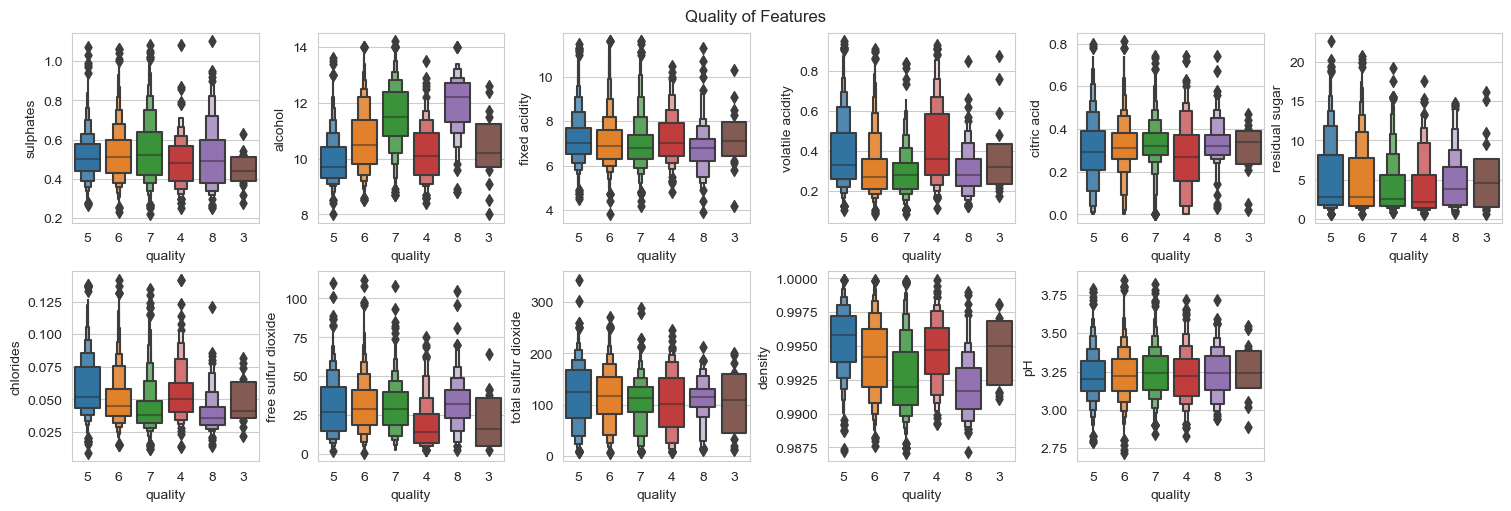

In [60]:
fig, axs = plt.subplots(2,6, figsize=(15,5), constrained_layout=True)
fig.suptitle("Quality of Features")

sns.boxenplot(data=df, y='sulphates', x='quality', ax=axs[0][0])

sns.boxenplot(data=df, y='alcohol', x='quality', ax=axs[0][1])

sns.boxenplot(data=df,y='fixed acidity', x='quality',  ax=axs[0][2])

sns.boxenplot(data=df,y='volatile acidity', x='quality',  ax=axs[0][3])

sns.boxenplot(data=df,y='citric acid', x='quality',  ax=axs[0][4])

sns.boxenplot(data=df,y='residual sugar', x='quality',  ax=axs[0][5])

sns.boxenplot(data=df,y='chlorides', x='quality',  ax=axs[1][0])

sns.boxenplot(data=df,y='free sulfur dioxide', x='quality',  ax=axs[1][1])

sns.boxenplot(data=df,y='total sulfur dioxide', x='quality',  ax=axs[1][2])

sns.boxenplot(data=df,y='density', x='quality',  ax=axs[1][3])

sns.boxenplot(data=df,y='pH', x='quality',  ax=axs[1][4])
fig.delaxes(axs[1][5])
plt.show()

`Insights`
* This plot showing there is relationship between quality and alcohol
* The density of wine also affecting the quality of alcohol
* The other features are not showing relationship with quality
* It seems like except alcohol and density features, all other features are overlapping.
* In those plots the quartile are overlapping

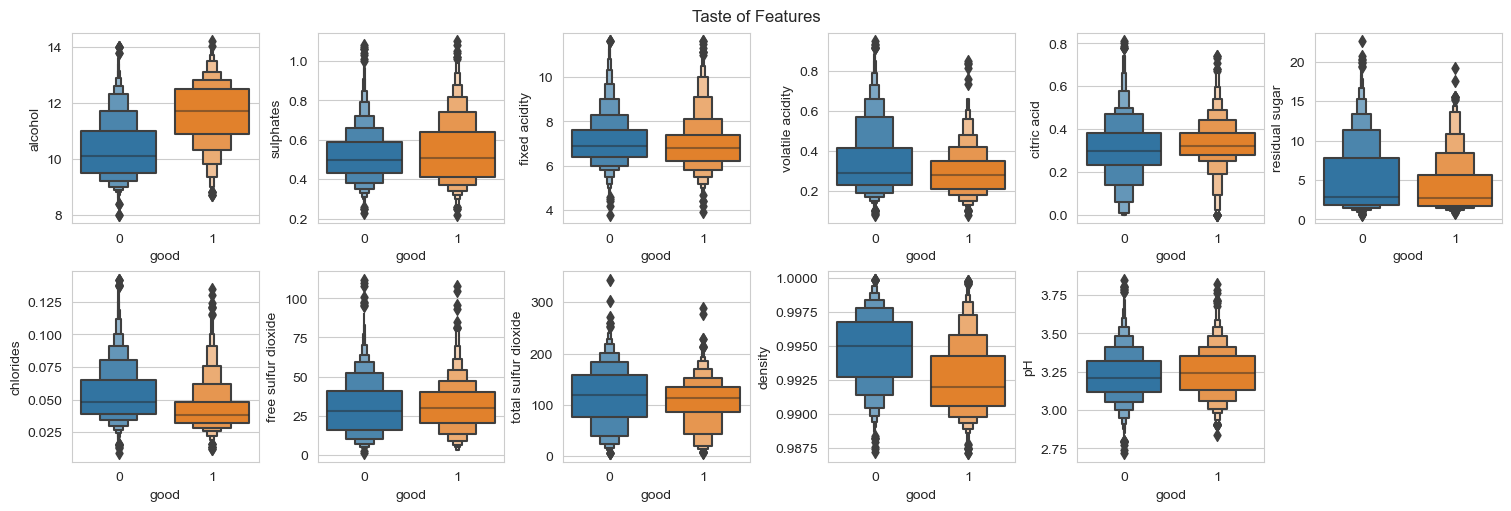

In [61]:
fig, axs = plt.subplots(2, 6, figsize=(15, 5), constrained_layout=True)
fig.suptitle("Taste of Features")

sns.boxenplot(data=df, x='good', y='alcohol', ax=axs[0, 0])

sns.boxenplot(data=df, y='sulphates', x='good', ax=axs[0, 1])

sns.boxenplot(data=df, y='fixed acidity', x='good', ax=axs[0, 2])

sns.boxenplot(data=df, y='volatile acidity', x='good', ax=axs[0, 3])

sns.boxenplot(data=df, y='citric acid', x='good', ax=axs[0, 4])

sns.boxenplot(data=df, y='residual sugar', x='good', ax=axs[0, 5])

sns.boxenplot(data=df, y='chlorides', x='good', ax=axs[1, 0])

sns.boxenplot(data=df, y='free sulfur dioxide', x='good', ax=axs[1, 1])

sns.boxenplot(data=df, y='total sulfur dioxide', x='good', ax=axs[1, 2])

sns.boxenplot(data=df, y='density', x='good', ax=axs[1, 3])

sns.boxenplot(data=df, y='pH', x='good', ax=axs[1, 4])

# Remove the extra subplot
fig.delaxes(axs[1, 5])

plt.show()


`Insights`
* This plot showing If the wine has more alcohol the taste is good otherwise in less alcohol in wine is bad taste
* Excatly If density of wine is less then its good taste
* if chlorides is decreases in wine may  the wine taste also becoming good.

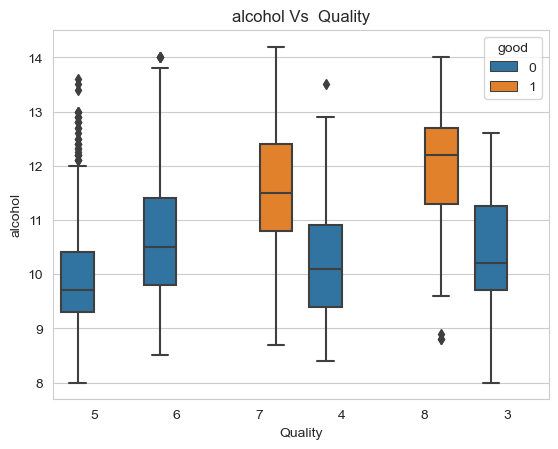

In [62]:
sns.boxplot(df,x="quality",y='alcohol',hue="good")
plt.title('alcohol Vs  Quality')
plt.xlabel('Quality')
plt.ylabel('alcohol')
plt.show()

`Insights`
* This plot shows there is relationship between alcohol and quality in wine
* if alcohol increases in wine the quality of wine also increases

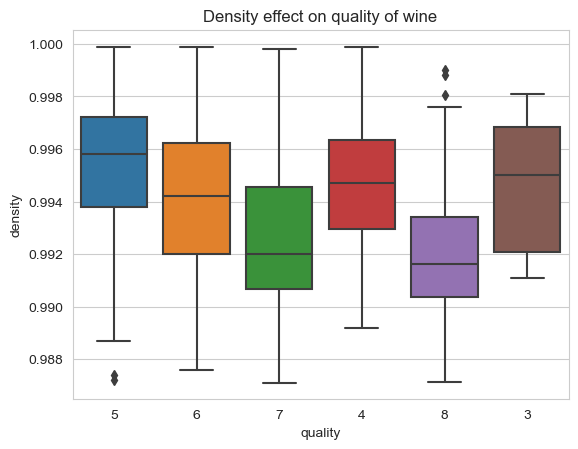

In [63]:
sns.boxplot(df,x='quality',y='density')
plt.title('Density effect on quality of wine')
plt.xlabel('quality')
plt.ylabel('density')
plt.show()

`Insights`
* This plot is showing if the density of wine decreses the quality of wine also increases 
* basically it showing they are inversly propotional to each other

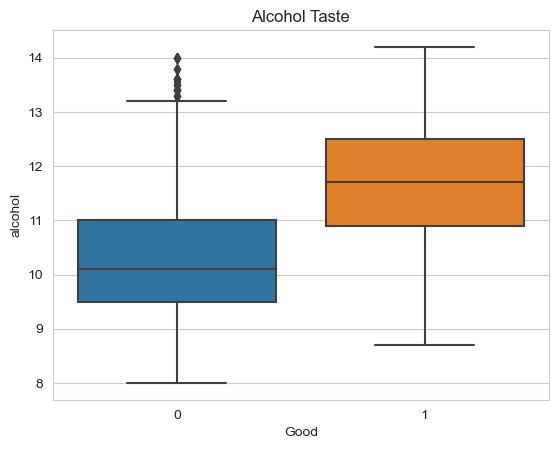

In [64]:
sns.boxplot(df,x='good',y='alcohol')
plt.title('Alcohol Taste')
plt.xlabel('Good')
plt.ylabel('alcohol')
plt.show()

`Insights`
* This plot showing if the alcohol is high in wine then it taste good
* if there is less alcohol in wine it taste bad

In [65]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'good', 'color'],
      dtype='object')

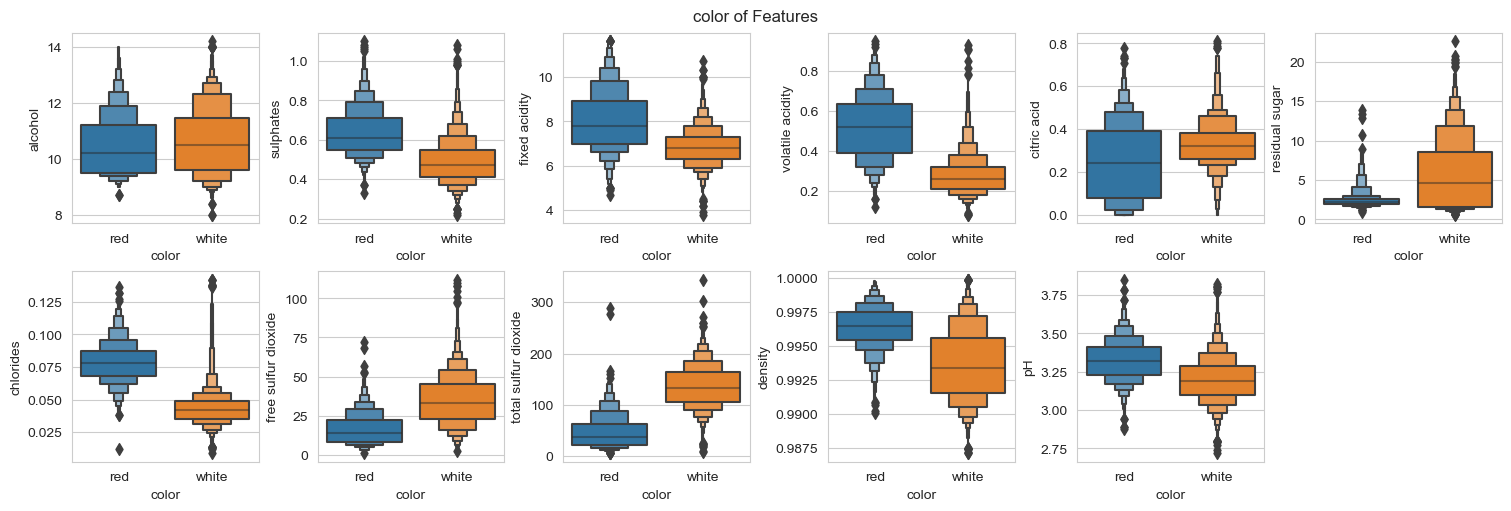

In [66]:
fig, axs = plt.subplots(2, 6, figsize=(15, 5), constrained_layout=True)
fig.suptitle("color of Features")

sns.boxenplot(data=df, x='color', y='alcohol', ax=axs[0, 0])

sns.boxenplot(data=df, y='sulphates', x='color', ax=axs[0, 1])

sns.boxenplot(data=df, y='fixed acidity', x='color', ax=axs[0, 2])

sns.boxenplot(data=df, y='volatile acidity', x='color', ax=axs[0, 3])

sns.boxenplot(data=df, y='citric acid', x='color', ax=axs[0, 4])

sns.boxenplot(data=df, y='residual sugar', x='color', ax=axs[0, 5])

sns.boxenplot(data=df, y='chlorides', x='color', ax=axs[1, 0])

sns.boxenplot(data=df, y='free sulfur dioxide', x='color', ax=axs[1, 1])

sns.boxenplot(data=df, y='total sulfur dioxide', x='color', ax=axs[1, 2])

sns.boxenplot(data=df, y='density', x='color', ax=axs[1, 3])

sns.boxenplot(data=df, y='pH', x='color', ax=axs[1, 4])

# Remove the extra subplot
fig.delaxes(axs[1, 5])

plt.show()


`Insights`
* In this plot sulphate,volatile acidity,chlorides,free sulfur dioxide,total sulphor dioxide is affecting in color of wine.
* There is less sulphate in white wine while in red wine it is more
* These is less volatile acid in white wine while in red wine it is more
* In white wine there is less chlorides but in red wine it is more
* Free sulphor dioxide and total sulphor dioxide is more in white wine while in red it is less

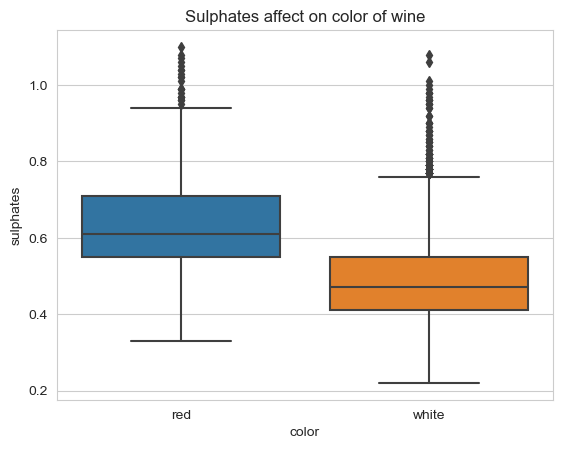

In [67]:
sns.boxplot(df,x='color',y='sulphates')
plt.title('Sulphates affect on color of wine')
plt.xlabel('color')
plt.ylabel('sulphates')
plt.show()

`Insights`
* In this plot it showing there is relationship among sulphate and color of wine
* There is less sulphate in white wine and while in red wine there is more sulphate

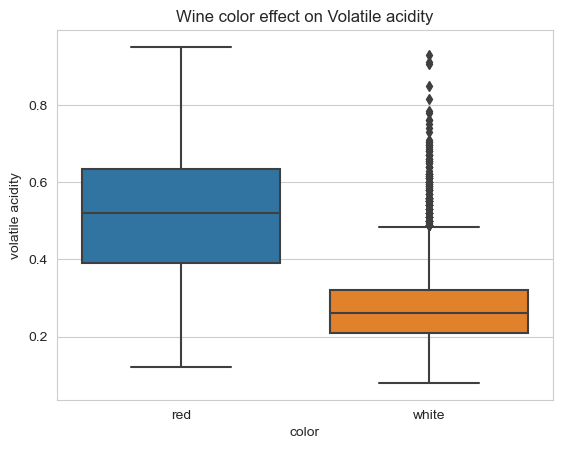

In [68]:
sns.boxplot(df,x='color',y='volatile acidity')
plt.title('Wine color effect on Volatile acidity')
plt.xlabel('color')
plt.ylabel('volatile acidity')
plt.show()

`Insights`
* This plot is showing There is relationship among volatile acidity and color of wine
* There is less volatile acidity in white wine while in red wine there is more volatile acidity 

In [69]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'good', 'color'],
      dtype='object')

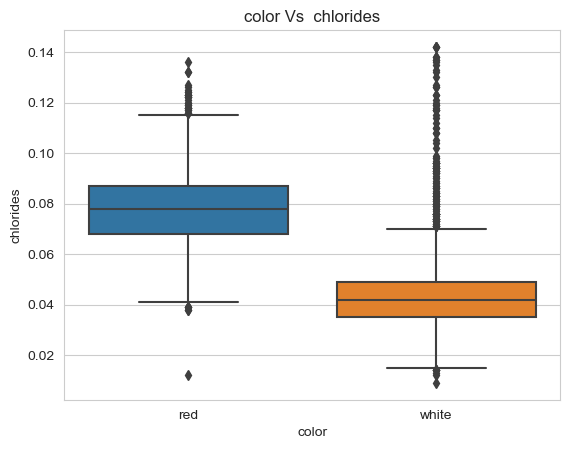

In [70]:
sns.boxplot(df,x='color',y='chlorides')
plt.title('color Vs  chlorides')
plt.xlabel('color')
plt.ylabel('chlorides')
plt.show()

`Insights`
* This plot showing there is relationship between chlorides and color of wine
* There is less chlorides in white wine while in red wine there is more wine

## Categorical Vs Categorical

<Axes: xlabel='quality'>

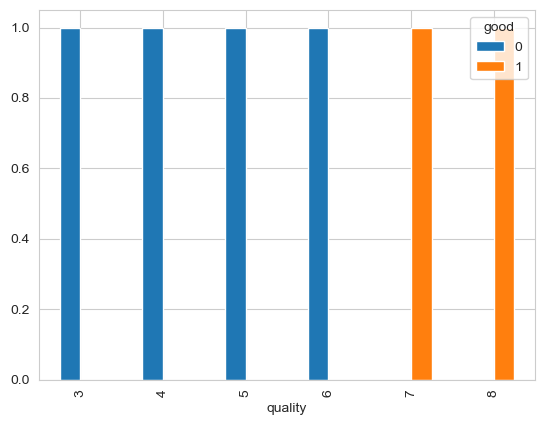

In [71]:
tab = pd.crosstab(df['quality'], df['good'], normalize='index')

tab.plot(kind='bar')

`Insights`
* It seems there is no relationship among quality and color of wine
* It looks all are quality of white wine and red wine is same


<Axes: xlabel='quality'>

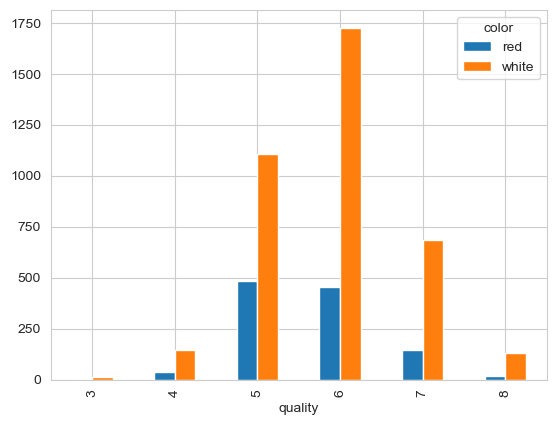

In [72]:
x=df.groupby(['quality', 'color']).size().unstack()
x.plot(kind="bar")


In [73]:
x

color,red,white
quality,,
3,2,13
4,37,146
5,486,1105
6,454,1728
7,146,685
8,16,129


In [74]:
cr=pd.crosstab(df['quality'], df['color'], normalize='index')

<Axes: xlabel='quality'>

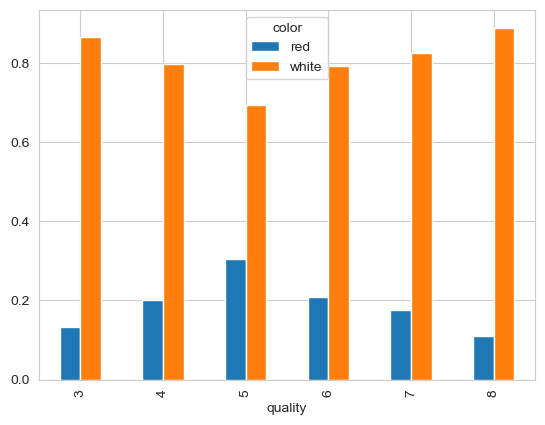

In [75]:
cr.plot(kind="bar")

`Insights`
* This plot showing That the probability of quality 3 and quality 8 of white wine is very close
* And the probability of  quality 4 and quality 6 are same
* While the probability of quality 4 and 6 of red wine are same
* And the probability pd quality 3 and 8 of red wine are very close

In [76]:
tab

good,0,1
quality,,
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0
6,1.0,0.0
7,0.0,1.0
8,0.0,1.0


<Axes: xlabel='color'>

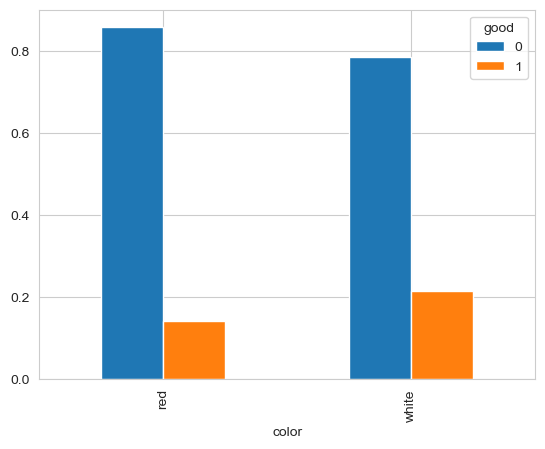

In [77]:
tab = pd.crosstab(df['color'], df['good'],normalize='index')

tab.plot(kind='bar')

`Insights`
* This plot showing there is high good taste in white wine than red wine
* while red wine has more bad taste than white wine

## Numerical vs Numerical

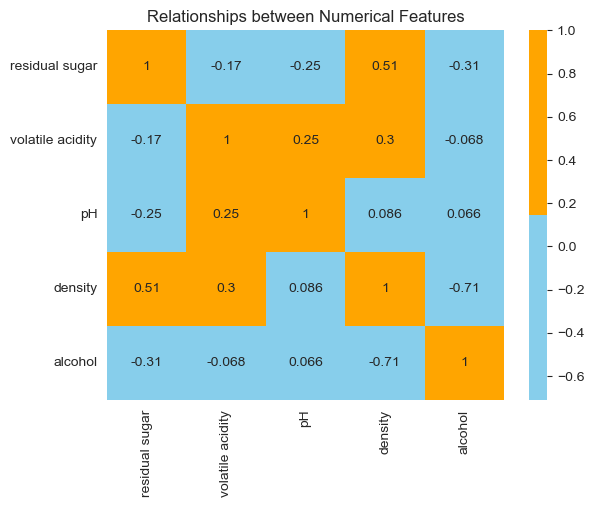

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
selected_columns = df[['residual sugar', 'volatile acidity', 'pH', 'density','alcohol']]

corr_matrix = selected_columns.corr(numeric_only=True)

cmap = sns.color_palette(["skyblue", "orange"])

sns.heatmap(corr_matrix, annot=True, cmap=cmap).set(title='Relationships between Numerical Features')

plt.show()


`Insights`
- The strongest positive correlation observed is between residual sugar and density (0.51).
- The strongest negative correlation is between density and alcohol (-0.71).
- Residual sugar and alcohol exhibit a moderate negative correlation.
- Volatile acidity shows moderate positive correlations with both pH and density.
- Alcohol content tends to decrease with increasing density and residual sugar.

### Task

* Explore the data distribution of each column.
* Identify some important patterns i.e. Which variables are most significant with respect to the target variable?
* Insights and Recommendations (i.e. Data Driven Business Decision)


#### Ans

* In univarite analysis I written all the distribution of each features
* Alcohol feature is more significant to target variable because if the level of alcohol increses in wine the wine taste is good and  its quality also good
* I found that people liked most no of white wine insted of red wine.If volatile acid,sulphate and chlorides level decreases in red wine ,then red wine quality and taste become good.